<a href="https://colab.research.google.com/github/PedroRozin/tp_e2/blob/main/e2_compu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Computacional - parte domicilaria 2do. Parcial.

## Delfina Perez y Pedro Rozín

In [ ]:
import numpy as np
import scipy as sp
#mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path_zip = '/content/drive/MyDrive/e2/pyexact.zip'

#unzip in a folder named 'pyexact'
!unzip -o $path_zip -d pyexact

Archive:  /content/drive/MyDrive/e2/pyexact.zip
  inflating: pyexact/bitwise_funcs.py  
  inflating: pyexact/build_mb_hamiltonian.py  
  inflating: pyexact/dense_fermionic_operators.py  
  inflating: pyexact/dense_hardcore_operators.py  
  inflating: pyexact/entropy.py      
  inflating: pyexact/expected.py     
  inflating: pyexact/expected_hb.py  
  inflating: pyexact/sparse_fermionic_operators.py  
  inflating: pyexact/sparse_hardcore_operators.py  
 extracting: pyexact/__init__.py     


In [ ]:
from pyexact.bitwise_funcs import binom, generate_states
from pyexact.build_mb_hamiltonian import build_mb_hamiltonian

In [ ]:
print(binom(4,2))

6


## Consigna 1


In [ ]:
eles = np.arange(1,30)
binoms = [binom(L, L//2) for L in eles]

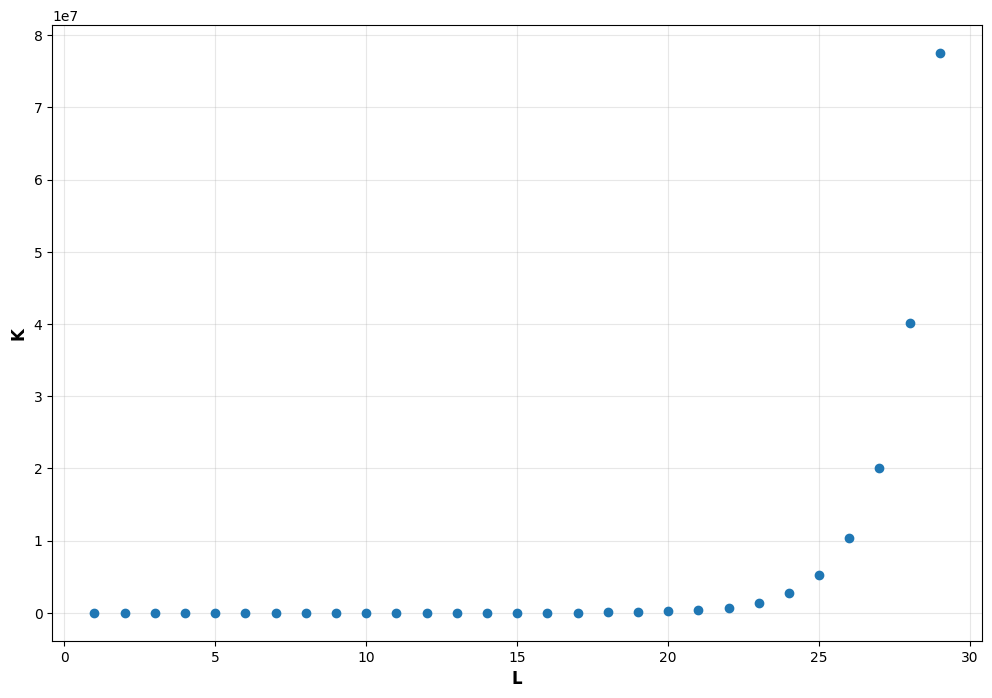

In [ ]:
#plot binoms
import matplotlib.pyplot as plt
#create figure 12x8
plt.figure(figsize=(12,8))
plt.plot(eles, binoms, 'o')
plt.xlabel('L', fontsize =12, fontweight = 'bold')
plt.ylabel('K', fontsize =12, fontweight = 'bold')
plt.grid(alpha =.3)
plt.show()

## Consigna 2
Implemente funciones que construyan las matrices T[ij] y U[ij] de L×L del modelo de Hubbard
para una cadena abierta de Ns sitios con esp ́ın (L = 2Ns). Verifique qué deber ıa modificar
para cerrar la cadena y, opcionalmente, repita el procedimiento para una cinta de 2 × Ns sitios
con esp ́ın (L = 4Ns).

In [ ]:

def build_T_matrix(Ns, t=-1):
    #t es el parámetro de interacción. default =-1
    L = 2 * Ns  # orbitales
    T = np.zeros((L, L)) #matriz

    for i in range(Ns - 1):
        #spin up
        T[2 * i, 2 * (i + 1)] = 1
        T[2 * (i + 1), 2 * i] = 1
        # spin down
        T[2 * i + 1, 2 * (i + 1) + 1] = 1
        T[2 * (i + 1) + 1, 2 * i + 1] = 1

    return T*t

def build_U_matrix(Ns, U = 1):
  #U es la interacción, definida por default a 1
    L = 2 * Ns  # orbitales
    U_matrix = np.zeros((L, L))
    for i in range(Ns):
        # interacción spin up y spin down mismo nivel
        U_matrix[2 * i, 2 * i + 1] = U
        U_matrix[2 * i + 1, 2 * i] = U

    return U_matrix*1/2



In [ ]:
#chequeo que me quede lo de la guía:
Ns = 2
U_matrix = build_U_matrix(Ns, 1)
print(f"\nU matrix for Ns = {Ns}:")
display(U_matrix)
print('')
print(f"T matrix for Ns = {Ns}:")
T_matrix = build_T_matrix(Ns)

display(T_matrix)


U matrix for Ns = 2:


array([[0. , 0.5, 0. , 0. ],
       [0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5],
       [0. , 0. , 0.5, 0. ]])


T matrix for Ns = 2:


array([[-0., -0., -1., -0.],
       [-0., -0., -0., -1.],
       [-1., -0., -0., -0.],
       [-0., -1., -0., -0.]])

In [ ]:
#chequeo tamaños:
Ns = 10
U_matrix = build_U_matrix(Ns, 1)
T_matrix = build_T_matrix(Ns)

expected_shape = (2 * Ns, 2 * Ns)
print(f"esperado: {expected_shape}")
print(f"esperado = obtenido: {T_matrix.shape == expected_shape}")
print(f"esperado = obtenido: {U_matrix.shape == expected_shape}")

esperado: (20, 20)
esperado = obtenido: True
esperado = obtenido: True


## Consigna 3
Construya y diagonalice el Hamiltoniano del modelo de Hubbard para una cadena abierta de
dos (L = 4) y tres (L = 6) sitios con esp ́ın y medio llenado (N = L/2). Grafique el espectro de
energ ́ıas por electr ́on (E/N) como funci ́on de U en unidades de t = 1. Opcionalmente, repita
el procedimiento para la cinta de 2 × Ns sitios.

In [ ]:
T_4 = build_T_matrix(2)
U_4 = build_U_matrix(2)
#build hamiltonian
H_4 = build_mb_hamiltonian(T_4, U_4, L=4)
#ahora con 6:
T_6 = build_T_matrix(3)
U_6 = build_U_matrix(3)
H_6 = build_mb_hamiltonian(T_6, U_6, L=6)

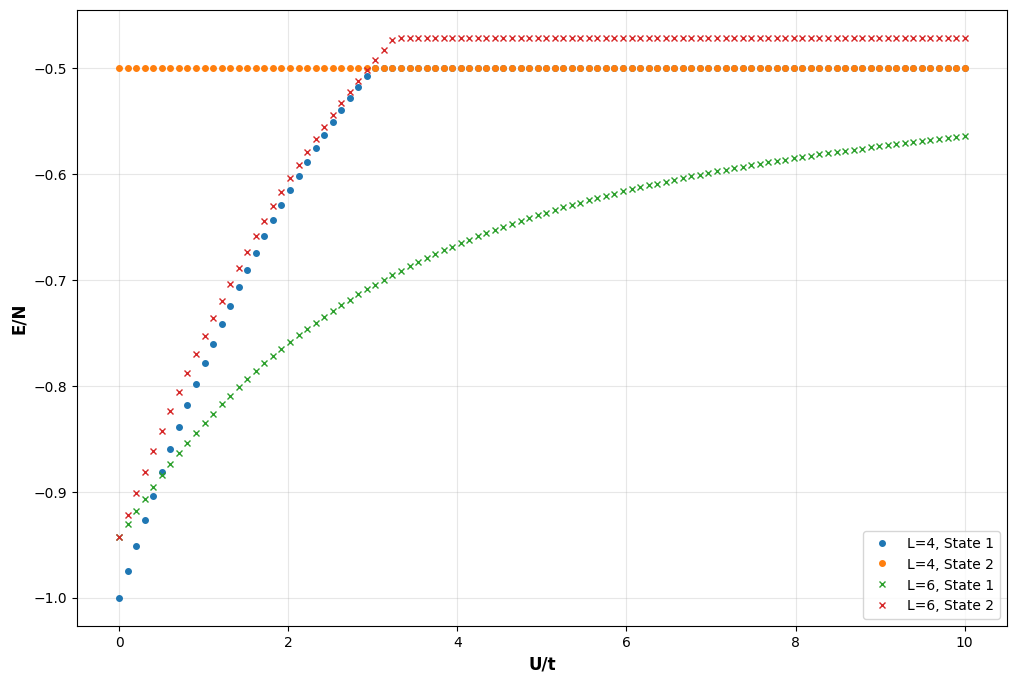

In [ ]:
U_values = np.linspace(0, 10, 100) #values de energía que vamos a usar

eigenvalues_4_list = []
eigenvalues_6_list = []

for U in U_values:
    U_matrix_4 = build_U_matrix(2, U)
    H_4 = build_mb_hamiltonian(T_4, U_matrix_4, L=4)
    eigenvalues_4, _ = np.linalg.eigh(H_4) #me da eigenvalues y eigenvectors, pero solo me importa el primer elemento de la tuple
    eigenvalues_4_list.append(eigenvalues_4 / (4/2))

    U_matrix_6 = build_U_matrix(3, U)
    H_6 = build_mb_hamiltonian(T_6, U_matrix_6, L=6)
    eigenvalues_6, _ = np.linalg.eigh(H_6)
    eigenvalues_6_list.append(eigenvalues_6 / (6/2))



plt.figure(figsize=(12, 8))
for i in range(2):
    plt.plot(U_values, [eig[i] for eig in eigenvalues_4_list], 'o', markersize=4, label=f'L=4, State {i+1}')
for i in range(2):
     plt.plot(U_values, [eig[i] for eig in eigenvalues_6_list], 'x', markersize=4, label=f'L=6, State {i+1}')


plt.xlabel('U/t', fontsize=12, fontweight='bold')
plt.ylabel('E/N', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

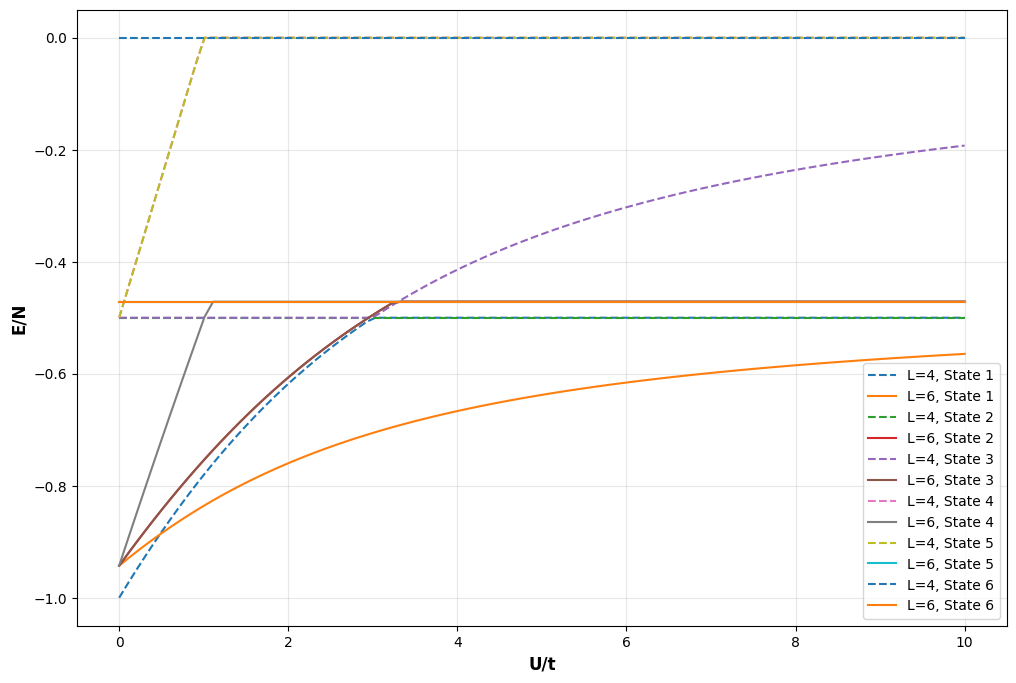

In [ ]:
#hago lo mismo para varios niveles:

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.plot(U_values, [eig[i] for eig in eigenvalues_4_list], '--', markersize=4, label=f'L=4, State {i+1}')
    plt.plot(U_values, [eig[i] for eig in eigenvalues_6_list], '-', markersize=4, label=f'L=6, State {i+1}')


plt.xlabel('U/t', fontsize=12, fontweight='bold')
plt.ylabel('E/N', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Consigna 4
Construya y diagonalice el Hamiltoniano en el ensamble gran can ́onico para una cadena abierta
de uno (L = 2), dos (L = 4) y tres (L = 6) sitios con esp ́ın. En este ensamble, recuerde que el
n umero de electrones var ́ıa (0 ≤ N ≤ L) y debe considerar el potencial qu ́ımico, por ejemplo,
agregando −μ a la diagonal de la matriz de hopping $T[ij]$. A partir de esto, resuelva:\

a) El numero medio de ocupacion ⟨N⟩ como función de μ para valores de U = 0 (sin interacción) y U = 4 (con interacción) y distintos valores de temperatura. En el caso con
interaccion, identifique la aparici ́on de la “meseta de Mott” (caracterıstica de un aislante)
en ocupaciones impares de electrones y compare este resultado con el caso sin interaccion.\

b) El momento magnetico local ⟨mˆ2⟩ como funcion de U, fijando valores de μ = U/2 (mitad
de llenado) y temperatura T = 2. Repita el procedimiento como funci ́on de la temperatura T, fijando U = 4 y μ = 2.

### Definir parámetros y matrices
Defino los sitios y las matrices de las consignas anteriores


In [ ]:
sitios_Ns = [1, 2, 3] # L=2, 4, 6
valores_U = np.linspace(0, 10, 100)
valores_mu = np.linspace(-5, 5, 100)
valores_T = [0.1,0.2, 0.5, 1.0, 5.0]

matrices_T = {}
matrices_U_base = {}

for Ns in sitios_Ns:
    matrices_T[Ns] = build_T_matrix(Ns)
    matrices_U_base[Ns] = build_U_matrix(Ns, U=1)

### Hamiltoniano en el ensamble gran canónico
hago una función análoga a la de la librería, pero teniendo en cuenta el potencial químico


In [ ]:
import pandas as pd
def build_grand_canonical_hamiltonian(T_matrix, U_matrix, mu, L): #idem a la función de la librería, pero con $\mu$
    mu_matrix = np.eye(L) * -mu
    T_matrix_gc = T_matrix + mu_matrix
    H_gc = build_mb_hamiltonian(T_matrix_gc, U_matrix, L=L)
    return H_gc

### Calcular el número medio de ocupación
Para `U = 0` y `U = 4`, calcular el número medio de ocupación (`N_medio`) como función de `mu` para diferentes valores de `T`.


In [ ]:
#diccionarios donde voy a guardar los resultados
resultados_N_medio_U0 = {}
resultados_N_medio_U4 = {}
for Ns in sitios_Ns:
    L = 2 * Ns
    T_base = matrices_T[Ns]

    for T in valores_T:
        n_medio_u0_list = []
        n_medio_u4_list = []

        U_matrix_u0 = build_U_matrix(Ns, U=0)
        U_matrix_u4 = build_U_matrix(Ns, U=4)

        for mu in valores_mu:
            #  N_medio para U=0
            H_gc_u0 = build_grand_canonical_hamiltonian(T_base, U_matrix_u0, mu, L)
            eigenvalues_u0 = np.linalg.eigvalsh(H_gc_u0) #me la sugirió Gemini esta función: calcula SOLAMENTE eigenvalues para matrices hermíticas

            if T == 0:
                # caso T=0: 1 if eigenvalue < mu, 0 si no
                n_medio_u0 = np.sum(eigenvalues_u0 < mu)
            else:
                # distribución fermi dirac T!=0
                n_medio_u0 = np.sum(1 / (np.exp((eigenvalues_u0 - mu) / T) + 1))

            n_medio_u0_list.append(n_medio_u0)

            # N_medio para U=4
            H_gc_u4 = build_grand_canonical_hamiltonian(T_base, U_matrix_u4, mu, L)
            eigenvalues_u4 = np.linalg.eigvalsh(H_gc_u4)

            if T == 0:
                 # caso T=0: 1 if eigenvalue < mu, 0 si no
                n_medio_u4 = np.sum(eigenvalues_u4 < mu)
            else:
                # distribución fermi dirac T!=0
                n_medio_u4 = np.sum(1 / (np.exp((eigenvalues_u4 - mu) / T) + 1))

            n_medio_u4_list.append(n_medio_u4)

        resultados_N_medio_U0[(Ns, T)] = n_medio_u0_list
        resultados_N_medio_U4[(Ns, T)] = n_medio_u4_list



#creo dataframe para poder visualizar resultados. cada key es una tupla (Ns,T)

df_N_medio_U0 = pd.DataFrame(resultados_N_medio_U0)
df_N_medio_U4 = pd.DataFrame(resultados_N_medio_U4)
display(df_N_medio_U0.head())
print('')
display(df_N_medio_U4.head())

1                                                         2  \
            0.1           0.2       0.5       1.0       5.0           0.1   
0  1.928750e-22  1.388794e-11  0.000045  0.006784  0.554773  1.928750e-22   
1  5.296112e-22  2.301328e-11  0.000056  0.007510  0.570194  5.296112e-22   
2  1.454248e-21  3.813460e-11  0.000068  0.008316  0.586075  1.454248e-21   
3  3.993188e-21  6.319168e-11  0.000083  0.009208  0.602429  3.993188e-21   
4  1.096481e-20  1.047130e-10  0.000102  0.010196  0.619268  1.096481e-20   

                                                          3                \
            0.2       0.5       1.0       5.0           0.1           0.2   
0  1.388794e-11  0.000045  0.006977  1.123285  1.928750e-22  1.388794e-11   
1  2.301328e-11  0.000056  0.007747  1.168589  5.296112e-22  2.301329e-11   
2  3.813460e-11  0.000068  0.008605  1.215976  1.454248e-21  3.813461e-11   
3  6.319168e-11  0.000083  0.009563  1.265546  3.993188e-21  6.319169e-11   
4  1.047130e-10  0.000102  0.010632  1.317403  1.096481e-20  1.047130e-10   

                                 
        0.5       1.0       5.0  
0  0.000045  0.007191  2.231811  
1  0.000056  0.008011  2.349495  
2  0.000068  0.008930  2.474324  
3  0.000083  0.009962  2.606766  
4  0.000102  0.011124  2.747322

1                                                         2  \
            0.1           0.2       0.5       1.0       5.0           0.1   
0  1.928750e-22  1.388794e-11  0.000045  0.006784  0.529229  1.928750e-22   
1  5.296112e-22  2.301328e-11  0.000056  0.007510  0.543170  5.296112e-22   
2  1.454248e-21  3.813460e-11  0.000068  0.008315  0.557494  1.454248e-21   
3  3.993188e-21  6.319168e-11  0.000083  0.009207  0.572209  3.993188e-21   
4  1.096481e-20  1.047130e-10  0.000102  0.010195  0.587325  1.096481e-20   

                                                          3                \
            0.2       0.5       1.0       5.0           0.1           0.2   
0  1.388794e-11  0.000045  0.006975  1.025051  1.928750e-22  1.388794e-11   
1  2.301328e-11  0.000056  0.007744  1.063498  5.296112e-22  2.301329e-11   
2  3.813460e-11  0.000068  0.008602  1.103554  1.454248e-21  3.813461e-11   
3  6.319168e-11  0.000083  0.009558  1.145290  3.993188e-21  6.319169e-11   
4  1.047130e-10  0.000102  0.010626  1.188776  1.096481e-20  1.047130e-10   

                                 
        0.5       1.0       5.0  
0  0.000045  0.007187  1.951798  
1  0.000056  0.008005  2.046536  
2  0.000068  0.008922  2.146492  
3  0.000083  0.009951  2.251973  
4  0.000102  0.011109  2.363303

Ocupación media vs mu para U=0 y U=4 para cada combinación T y Ns. Hago un gráfico para cada N_s. Observamos el típico gráfico de transición de fase (parecido al del $C_v$ vs. T de teo3).
Para algunos valores de U vemos la meseta de Mott de la guía



N_s = 1


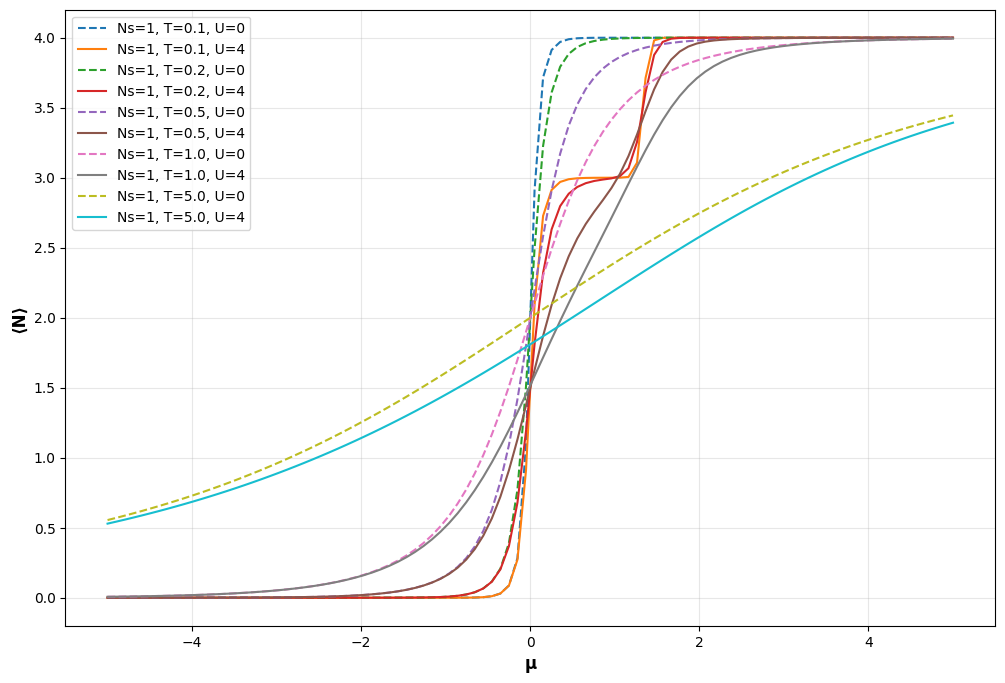

N_s = 2


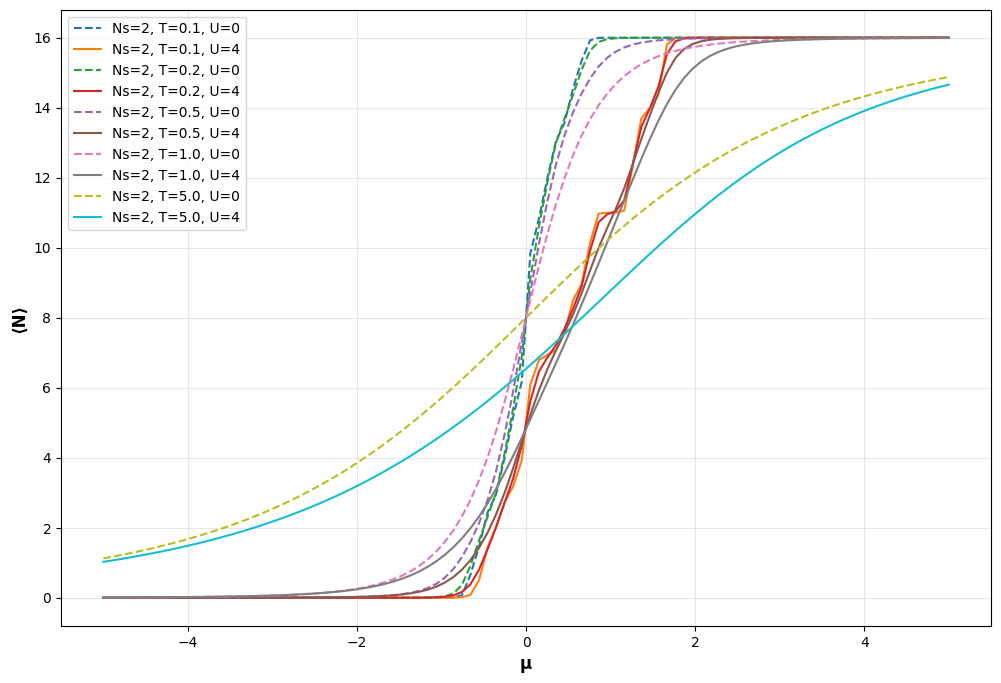

N_s = 3


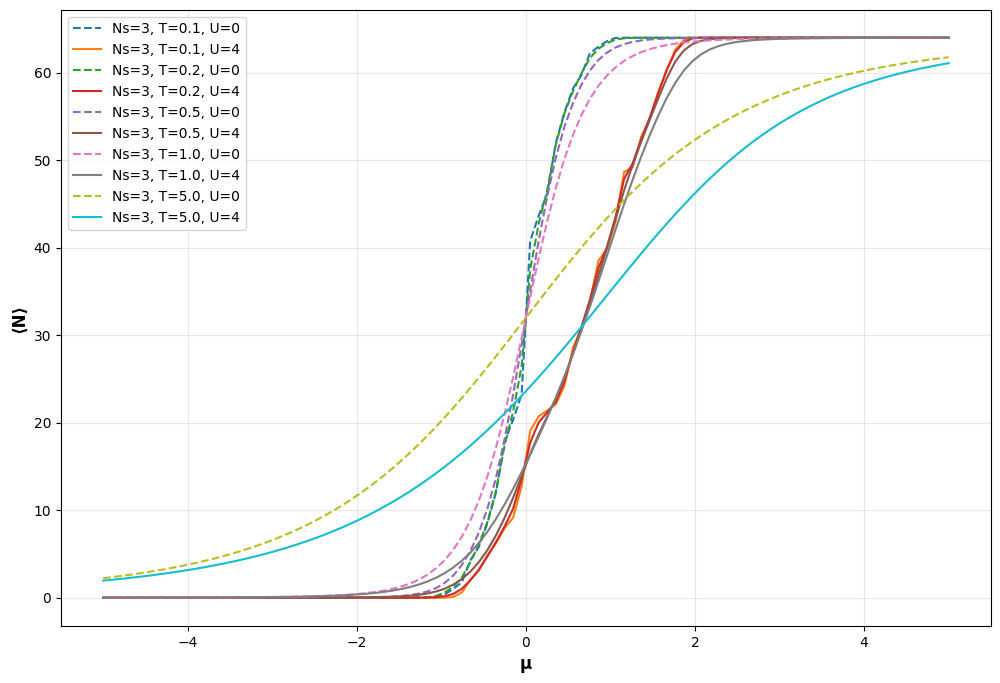

In [ ]:
for Ns in sitios_Ns:
    L = 2 * Ns
    plt.figure(figsize=(12, 8))
    for T in valores_T:
        n_medio_u0 = resultados_N_medio_U0[(Ns, T)]
        n_medio_u4 = resultados_N_medio_U4[(Ns, T)]

        plt.plot(valores_mu, n_medio_u0, '--', label=f'Ns={Ns}, T={T}, U=0')
        plt.plot(valores_mu, n_medio_u4, '-', label=f'Ns={Ns}, T={T}, U=4')
    print(f'N_s = {Ns}')

    plt.xlabel('μ', fontsize=12, fontweight='bold')
    plt.ylabel('⟨N⟩', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

### Calcular el momento magnético local


In [ ]:
resultados_momento_magnetico_U_vary = {}
resultados_momento_magnetico_T_vary = {}

valores_U_momento = np.linspace(0, 10, 50)
valores_T_momento = np.linspace(0.1, 10, 50)

In [ ]:
#idem a la consigna anterior pero para momento magnético
for Ns in sitios_Ns:
    L = 2 * Ns
    T_base = matrices_T[Ns]
    resultados_momento_magnetico_U_vary[Ns] = []

    for U in valores_U_momento:
        mu = U / 2
        T = 2.0
        U_matrix = build_U_matrix(Ns, U)
        H_gc = build_grand_canonical_hamiltonian(T_base, U_matrix, mu, L)
        eigenvalues, eigenvectors = np.linalg.eigh(H_gc)

        momento_magnetico_squared_U = 0
        for i in range(Ns):
            # mu^2 para cada sitio:
            momento_magnetico_site_i = 0
            for alpha in range(len(eigenvalues)):
                E_alpha = eigenvalues[alpha]
                psi_alpha = eigenvectors[:, alpha]

                #  2*i == spin up; 2*i + 1 == spin down
                n_i_up_alpha = abs(psi_alpha[2 * i])**2
                n_i_down_alpha = abs(psi_alpha[2 * i + 1])**2

                if T == 0: #caso T=0 por separado (como antes)
                    fermi_dirac = 1 if E_alpha < mu else 0
                else:
                    fermi_dirac = 1 / (np.exp((E_alpha - mu) / T) + 1)

                momento_magnetico_site_i += (n_i_up_alpha - n_i_down_alpha) * fermi_dirac

            momento_magnetico_squared_U += momento_magnetico_site_i**2
        resultados_momento_magnetico_U_vary[Ns].append(momento_magnetico_squared_U)

#genero dfs para visualizar resultados. ahora, cada key representa únicamente al Ns
df_momento_magnetico_U_vary = pd.DataFrame(resultados_momento_magnetico_U_vary)
df_momento_magnetico_T_vary = pd.DataFrame(resultados_momento_magnetico_T_vary)
display(df_momento_magnetico_U_vary.head())
print('')
display(df_momento_magnetico_T_vary.head())

,1,2,3
0,0.000000,3.520600e-31,4.509685e-32
1,0.000162,3.064679e-04,4.879827e-04
2,0.000643,1.215731e-03,1.927062e-03
3,0.001425,2.697879e-03,4.244826e-03
4,0.002480,4.704729e-03,7.327609e-03


""


### Variamos T:
Hago lo mismo pero fijando U y $\mu$ y barro en T (y en los sitios).


In [ ]:
for Ns in sitios_Ns:
    L = 2 * Ns
    T_base = matrices_T[Ns]
    resultados_momento_magnetico_T_vary[Ns] = []

    U = 4.0
    mu = 2.0
    U_matrix = build_U_matrix(Ns, U)

    for T in valores_T_momento:
        H_gc = build_grand_canonical_hamiltonian(T_base, U_matrix, mu, L)
        eigenvalues, eigenvectors = np.linalg.eigh(H_gc)

        momento_magnetico_squared_T = 0
        for i in range(Ns):
            momento_magnetico_site_i = 0
            for alpha in range(len(eigenvalues)):
                E_alpha = eigenvalues[alpha]
                psi_alpha = eigenvectors[:, alpha]

                n_i_up_alpha = abs(psi_alpha[2 * i])**2
                n_i_down_alpha = abs(psi_alpha[2 * i + 1])**2

                if T == 0:
                    fermi_dirac = 1 if E_alpha < mu else 0
                else:
                    fermi_dirac = 1 / (np.exp((E_alpha - mu) / T) + 1)

                momento_magnetico_site_i += (n_i_up_alpha - n_i_down_alpha) * fermi_dirac

            momento_magnetico_squared_T += momento_magnetico_site_i**2
        resultados_momento_magnetico_T_vary[Ns].append(momento_magnetico_squared_T)

#dfs
df_momento_magnetico_U_vary = pd.DataFrame(resultados_momento_magnetico_U_vary)
df_momento_magnetico_T_vary = pd.DataFrame(resultados_momento_magnetico_T_vary)
display(df_momento_magnetico_U_vary.head())
print('')
display(df_momento_magnetico_T_vary.head())

,1,2,3
0,0.000000,3.520600e-31,4.509685e-32
1,0.000162,3.064679e-04,4.879827e-04
2,0.000643,1.215731e-03,1.927062e-03
3,0.001425,2.697879e-03,4.244826e-03
4,0.002480,4.704729e-03,7.327609e-03


,1,2,3
0,4.248355e-18,1.214783e-11,3.973825e-09
1,1.762862e-06,8.791634e-05,1.634820e-04
2,3.315866e-04,2.413812e-03,2.612565e-03
3,2.719179e-03,1.016246e-02,1.033707e-02
4,7.651730e-03,2.129560e-02,2.185796e-02


### Plots

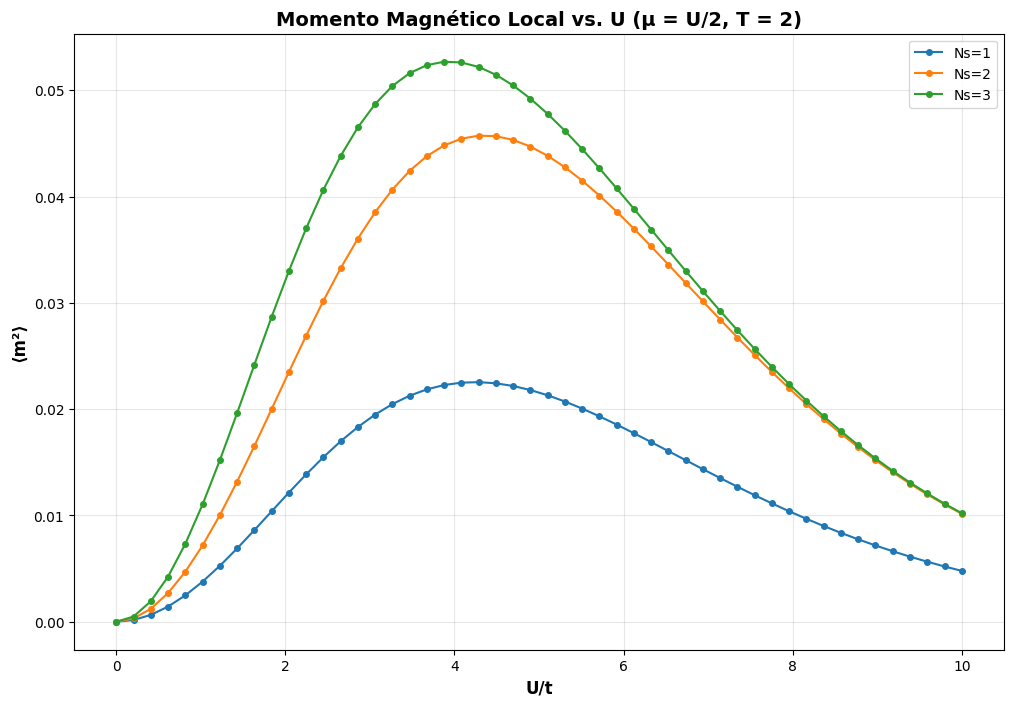

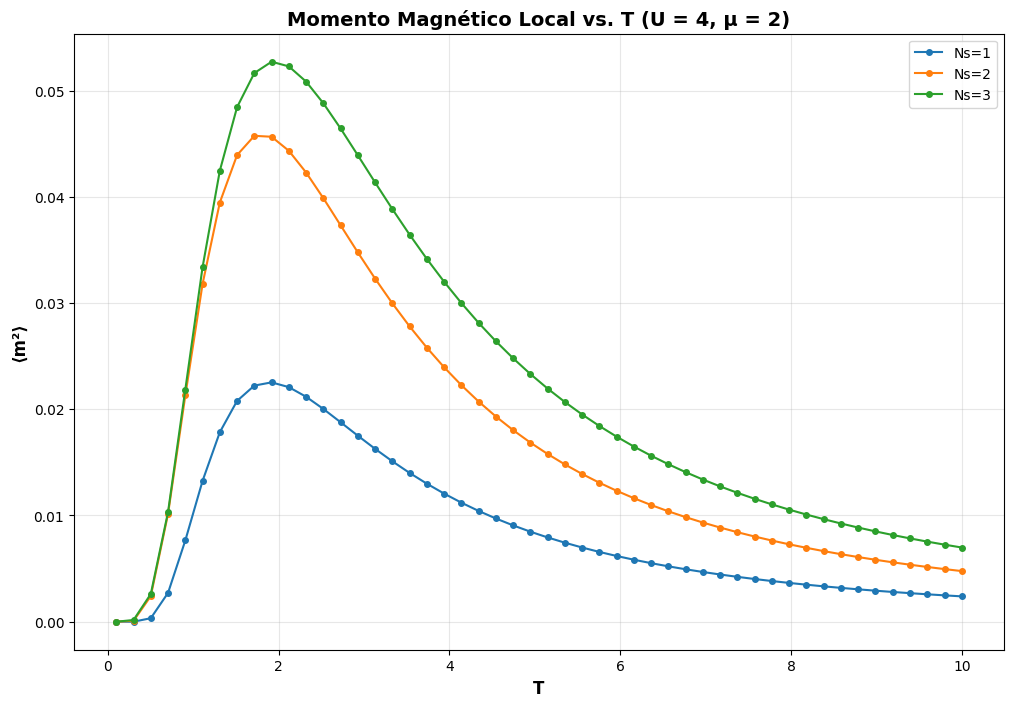

In [ ]:
plt.figure(figsize=(12, 8))
for Ns in sitios_Ns:
    plt.plot(valores_U_momento, resultados_momento_magnetico_U_vary[Ns], 'o-', markersize=4, label=f'Ns={Ns}')

plt.xlabel('U/t', fontsize=12, fontweight='bold')
plt.ylabel('⟨m²⟩', fontsize=12, fontweight='bold')
plt.title('Momento Magnético Local vs. U (μ = U/2, T = 2)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
for Ns in sitios_Ns:
    plt.plot(valores_T_momento, resultados_momento_magnetico_T_vary[Ns], 'o-', markersize=4, label=f'Ns={Ns}')

plt.xlabel('T', fontsize=12, fontweight='bold')
plt.ylabel('⟨m²⟩', fontsize=12, fontweight='bold')
plt.title('Momento Magnético Local vs. T (U = 4, μ = 2)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Pequeño análisis:
--------------------------------------------------------------
U=0 (Sin interacción):
- Las curvas ⟨N⟩ vs. μ muestran una transición suave de ⟨N⟩ de 0 a L a medida que μ aumenta.
- La pendiente de la transición es más pronunciada a temperaturas más bajas, acercándose a una escalón para T=0.1 (aproximación típica para hacer la integral fea de Teo3).


U=4:
- Las curvas ⟨N⟩ vs. μ también muestran transiciones, pero a U=4 se observa la 'meseta de Mott'.
- La meseta es más pronunciada y clara a temperaturas más bajas (T=0.1). A temperaturas mayores (ej. T=5.0), la meseta se vuelve menos definida y la transición es más suave.
- Comparando con U=0, la meseta en U=4 parecería mostrar que la interacción U 'suprime' las fluctuaciones de carga a medio llenado; estoe lleva a un comportamiento de aislante. El caso U=0 refiere a un metal conductor.
- El tamaño de la cadena (Ns) afecta la altura máxima de la meseta (que corresponde a N=L/2) y a la anchura de la transición en general.

Análisis de las gráficas de Momento Magnético Local (⟨m²⟩):
---------------------------------------------------------
⟨m²⟩ vs. U (μ = U/2, T = 2):
- Para todos los tamaños de cadena, ⟨m²⟩ aumenta con U.
- Este aumento indica que la interacción U favorece la localización de electrones y la formación de momentos magnéticos locales.
- A medida que U se hace grande, ⟨m²⟩ parecería saturarse o aumentar más lentamente y se acerca a un valor máximo que depende de Ns

⟨m²⟩ vs. T (U = 4, μ = 2):
- Para todos los tamaños de cadena, ⟨m²⟩ disminuye a medida que aumenta la temperatura T.
- A bajas temperaturas, ⟨m²⟩ es relativamente alto, lo que sugiere una mayor correlación magnética.
- A altas temperaturas, la agitación térmica desordena los momentos magnéticos y provoac uns disminución de ⟨m²⟩, acercándose a cero para T altas (aunque el rango graficado llega a hasta T=10K, pero bueno, se entiende).